# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
total_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_driver = total_fare_count / total_driver_count
avg_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_ride_count,
    "Total Drivers": total_driver_count,
    "Total Fares": total_fare_count,
    "Avg. Fare per Ride": avg_fare_ride,
    "Avg. Fare per Driver": avg_fare_driver})

In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Avg. Fare per Ride"] = pyber_summary_df["Avg. Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Avg. Fare per Driver"] = pyber_summary_df["Avg. Fare per Driver"].map("${:,.2f}".format)

# Display the data frame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg. Fare per Ride,Avg. Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Read the merged DataFrame
pyber_data_df.set_index(["date","type"],inplace=True)
pyber_data_df

,,city,fare,ride_id,driver_count
date,type,,,,
2019-01-14 10:14:22,Urban,Lake Jonathanshire,13.83,5739410935873,5
2019-03-04 18:24:09,Urban,South Michelleport,30.24,2343912425577,72
2019-02-24 04:29:00,Urban,Port Samanthamouth,33.44,2005065760003,57
2019-02-10 23:22:03,Urban,Rodneyfort,23.44,5149245426178,34
2019-03-06 04:28:35,Urban,South Jack,34.58,3908451377344,46
...,...,...,...,...,...
2019-04-29 17:04:39,Rural,Michaelberg,13.38,8550365057598,6
2019-01-30 00:05:47,Rural,Lake Latoyabury,20.76,9018727594352,2
2019-02-10 21:03:50,Rural,North Jaime,11.11,2781339863778,1


In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

new_data = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]
new_data.head(5)

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75


In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
new_data = new_data.reset_index()
new_data

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pyber_pivot = new_data.pivot(index="date", columns="type", values="fare")
pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

pyber_pivot_slice = pyber_pivot.loc["2019-01-01":"2019-04-28"]
pyber_pivot_slice

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-27 17:58:27,14.01,NaN,NaN
2019-04-27 19:45:48,NaN,28.84,NaN
2019-04-27 20:41:36,NaN,NaN,8.28


In [16]:
pyber_pivot_slice = pyber_pivot_slice.reset_index()
pyber_pivot_slice

type,date,Rural,Suburban,Urban
0,2019-01-01 00:08:16,NaN,NaN,37.91
1,2019-01-01 00:46:46,NaN,47.74,NaN
2,2019-01-01 02:07:24,NaN,24.07,NaN
3,2019-01-01 03:46:50,NaN,NaN,7.57
4,2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...,...
2172,2019-04-27 17:58:27,14.01,NaN,NaN
2173,2019-04-27 19:45:48,NaN,28.84,NaN
2174,2019-04-27 20:41:36,NaN,NaN,8.28
2175,2019-04-27 23:26:03,NaN,NaN,19.06


In [17]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

pyber_pivot_slice = pyber_pivot_slice.set_index(["date"])

pyber_pivot_slice.index = pd.to_datetime(pyber_pivot_slice.index)

In [18]:
# 6. Check that the datatype for the index is datetime using df.info()
pyber_pivot_slice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [19]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

pyber_fare_week = pyber_pivot_slice.resample("W").sum()
pyber_fare_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [23]:
pyber_fare_week.dtypes

type
Rural       float64
Suburban    float64
Urban       float64
dtype: object

In [31]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

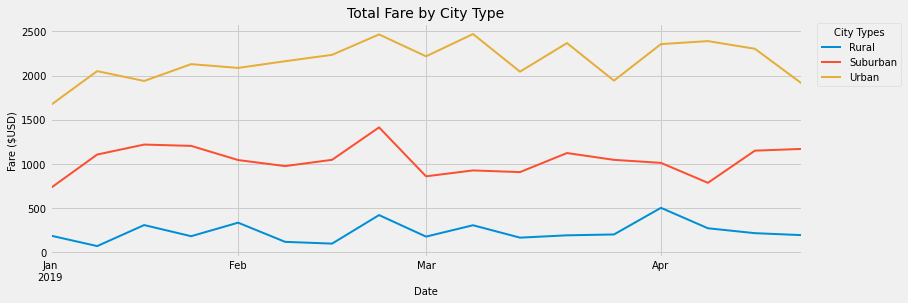

In [54]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_fare_week.reset_index().plot(x="date", figsize=(12,4), linewidth="2")

plt.title("Total Fare by City Type", fontsize=14)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.ylabel("Fare ($USD)", fontsize=10)
plt.xlabel("Date", fontsize=10)

lgnd = plt.legend(
    bbox_to_anchor=(1.02,1), 
    loc="upper left",
    borderaxespad=0,
    fontsize="10", 
    mode="Expanded", 
    title="City Types")
lgnd.get_title().set_fontsize(10)

plt.savefig("Analysis/pyberfare.png")

plt.show()